In [22]:
import pandas as pd

seq = pd.read_csv('../cleaned_data/seq_data.csv', index_col='Unnamed: 0')


In [2]:
drug = pd.read_csv('../data/DtcDrugTargetInteractions.csv')
drug.head()

/Users/flatiron/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,3,8,21,25,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,compound_id,standard_inchi_key,compound_name,synonym,target_id,target_pref_name,gene_names,wildtype_or_mutant,mutation_info,pubmed_id,...,compound_concentration_value_unit,substrate_type,substrate_relation,substrate_value,substrate_units,assay_description,title,journal,doc_type,annotation_comments
0,CHEMBL3545284,NaN,CERDULATINIB,NaN,NaN,5-AMP-ACTIVATED PROTEIN KINASE,NaN,wild_type,NaN,25253883.0,...,NaN,NaN,NaN,NaN,NaN,INHIBITION OF AMPK,THE NOVEL KINASE INHIBITOR PRT062070 (CERDULAT...,DRUG DISCOVERY AND TRANSLATIONAL MEDICINE,NaN,NaN
1,CHEMBL3545284,NaN,CERDULATINIB,NaN,NaN,"AMPK, AAPK1",NaN,wild_type,NaN,25253883.0,...,NM,33P LABELED PEPTIDE SUBSTRATE,NaN,NaN,NaN,MILLIPORE PANEL,THE NOVEL KINASE INHIBITOR PRT062070 (CERDULAT...,DRUG DISCOVERY AND TRANSLATIONAL MEDICINE,NaN,COULDN'T FIND SPESIFIC SUBSTRATES
2,CHEMBL3545284,NaN,CERDULATINIB,NaN,NaN,"ARK5, NUAK1",NaN,wild_type,NaN,25253883.0,...,NM,33P LABELED PEPTIDE SUBSTRATE,NaN,NaN,NaN,MILLIPORE PANEL,THE NOVEL KINASE INHIBITOR PRT062070 (CERDULAT...,DRUG DISCOVERY AND TRANSLATIONAL MEDICINE,NaN,COULDN'T FIND SPESIFIC SUBSTRATES
3,CHEMBL3545284,NaN,CERDULATINIB,NaN,NaN,AZI2,NaN,NaN,NaN,29191878.0,...,NM-UM,NaN,NaN,NaN,NaN,LC-MS/MS BASED KINOBEADS COMPETITIVE PULL-DOWN...,THE TARGET LANDSCAPE OF CLINICAL KINASE DRUGS,SCIENCE,NaN,NaN
4,CHEMBL3545284,NaN,CERDULATINIB,NaN,NaN,"CHEK1, CHK1",NaN,wild_type,NaN,25253883.0,...,NM,33P LABELED PEPTIDE SUBSTRATE,NaN,NaN,NaN,MILLIPORE PANEL,THE NOVEL KINASE INHIBITOR PRT062070 (CERDULAT...,DRUG DISCOVERY AND TRANSLATIONAL MEDICINE,NaN,COULDN'T FIND SPESIFIC SUBSTRATES


In [5]:
drug = drug[['target_id', 'target_pref_name']]

In [6]:
drug.dropna(inplace=True)

In [7]:
drug.shape

(5852382, 2)

In [10]:
len(drug.target_id.value_counts())

7036

In [23]:
merged = seq.merge(drug, on='target_id')

In [24]:
seq.shape, merged.shape

((204, 2), (453711, 3))

In [25]:
merged.drop_duplicates(inplace=True)

In [26]:
merged.dropna(inplace=True)
merged.shape

(375, 3)

In [27]:
merged.head()

,target_id,Sequence,target_pref_name
0,P06213,MATGGRRGAAAAPLLVAVAALLLGAAGHLYPGEVCPGMDIRNNLTR...,INSULIN RECEPTOR
4491,P78368,MDFDKKGGKGETEEGRRMSKAGGGRSSHGIRSSGTSSGVLMVGPNF...,CASEIN KINASE I GAMMA 2
5118,P78368,MDFDKKGGKGETEEGRRMSKAGGGRSSHGIRSSGTSSGVLMVGPNF...,CASEIN KINASE 1 GAMMA 2
6860,Q9H2K8,MRKGVLKDPEIADLFYKDDPEELFIGLHEIGHGSFGAVYFATNAHT...,SERINE/THREONINE-PROTEIN KINASE TAO3
6913,Q9H2K8,MRKGVLKDPEIADLFYKDDPEELFIGLHEIGHGSFGAVYFATNAHT...,TAO KINASE 3


In [35]:
protein_name = list(set(merged.target_pref_name.values))

In [36]:
protein_name

['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE KINASE 5',
 'TYROSINE-PROTEIN KINASE SYK',
 'SERINE/THREONINE-PROTEIN KINASE HASPIN',
 'EPITHELIAL DISCOIDIN DOMAIN-CONTAINING RECEPTOR 1',
 'FYN RELATED SRC FAMILY TYROSINE KINASE',
 'NEMO LIKE KINASE',
 'CYCLIN G ASSOCIATED KINASE',
 'RIBOSOMAL PROTEIN S6 KINASE A4',
 'WEE1 HOMOLOG 2',
 'HOMEODOMAIN INTERACTING PROTEIN KINASE 3',
 'CYCLIN-DEPENDENT KINASE 7',
 'INTERLEUKIN-1 RECEPTOR-ASSOCIATED KINASE 3',
 'GLYCOGEN SYNTHASE KINASE-3 ALPHA',
 'POLO LIKE KINASE 4',
 'UNC-51 LIKE KINASE 3',
 'MAP KINASE-ACTIVATED PROTEIN KINASE 2',
 'CASEIN KINASE 1 EPSILON',
 'CASEIN KINASE I EPSILON',
 'CDC LIKE KINASE 2',
 'DEATH ASSOCIATED PROTEIN KINASE 1',
 'PLATELET DERIVED GROWTH FACTOR RECEPTOR ALPHA',
 'SERINE/THREONINE-PROTEIN KINASE DCLK1',
 'SERINE/THREONINE-PROTEIN KINASE TBK1',
 'SERINE/THREONINE-PROTEIN KINASE 17B',
 'DEATH-ASSOCIATED PROTEIN KINASE 2',
 'CASEIN KINASE II ALPHA',
 'TYROSINE-PROTEIN KINASE FER',
 'CASEIN KINASE 1 DELTA',
 

In [3]:
from metapub import PubMedFetcher
import pandas as pd

proteins = ['MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE KINASE 5',
 'TYROSINE-PROTEIN KINASE SYK',
 'SERINE/THREONINE-PROTEIN KINASE HASPIN',
 'EPITHELIAL DISCOIDIN DOMAIN-CONTAINING RECEPTOR 1',
 'FYN RELATED SRC FAMILY TYROSINE KINASE',
 'NEMO LIKE KINASE',
 'CYCLIN G ASSOCIATED KINASE',
 'RIBOSOMAL PROTEIN S6 KINASE A4',
 'WEE1 HOMOLOG 2',
 'HOMEODOMAIN INTERACTING PROTEIN KINASE 3',
 'CYCLIN-DEPENDENT KINASE 7',
 'INTERLEUKIN-1 RECEPTOR-ASSOCIATED KINASE 3',
 'GLYCOGEN SYNTHASE KINASE-3 ALPHA',
 'POLO LIKE KINASE 4',
 'UNC-51 LIKE KINASE 3',
 'MAP KINASE-ACTIVATED PROTEIN KINASE 2',
 'CASEIN KINASE 1 EPSILON',
 'CASEIN KINASE I EPSILON',
 'CDC LIKE KINASE 2',
 'DEATH ASSOCIATED PROTEIN KINASE 1',
 'PLATELET DERIVED GROWTH FACTOR RECEPTOR ALPHA',
 'SERINE/THREONINE-PROTEIN KINASE DCLK1',
 'SERINE/THREONINE-PROTEIN KINASE TBK1',
 'SERINE/THREONINE-PROTEIN KINASE 17B',
 'DEATH-ASSOCIATED PROTEIN KINASE 2',
 'CASEIN KINASE II ALPHA',
 'TYROSINE-PROTEIN KINASE FER',
 'CASEIN KINASE 1 DELTA',
 'MYOTONIN-PROTEIN KINASE',
 'GLYCOGEN SYNTHASE KINASE 3 ALPHA',
 'SERINE/THREONINE-PROTEIN KINASE SGK1',
 'RECEPTOR PROTEIN-TYROSINE KINASE ERBB-2',
 'RIBOSOMAL PROTEIN S6 KINASE ALPHA 1',
 'EUKARYOTIC TRANSLATION INITIATION FACTOR 2-ALPHA KINASE 4',
 'ACTIVIN A RECEPTOR TYPE 2B',
 'HOMEODOMAIN INTERACTING PROTEIN KINASE 1',
 'CASEIN KINASE 1 ALPHA 1',
 'MUSCLE, SKELETAL RECEPTOR TYROSINE PROTEIN KINASE',
 'MYOSIN-IIIB',
 'STEM CELL GROWTH FACTOR RECEPTOR',
 'POLO LIKE KINASE 1',
 'DOUBLECORTIN LIKE KINASE 3',
 'CYCLIN DEPENDENT KINASE LIKE 2',
 'NT-3 GROWTH FACTOR RECEPTOR',
 'G PROTEIN-COUPLED RECEPTOR KINASE 1',
 'CYCLIN DEPENDENT KINASE 8',
 'SERINE/THREONINE-PROTEIN KINASE AKT2',
 'CASEIN KINASE I DELTA',
 'CDC LIKE KINASE 1',
 'CALCIUM/CALMODULIN DEPENDENT PROTEIN KINASE KINASE 1',
 'POLO LIKE KINASE 3',
 'TAO KINASE 1',
 'PROTEIN KINASE, CGMP-DEPENDENT, TYPE II',
 'PI3-KINASE P110-GAMMA SUBUNIT',
 'CASEIN KINASE 2 ALPHA 2',
 'PROTEIN TYROSINE KINASE 2 BETA',
 'SERINE/THREONINE-PROTEIN KINASE NIM1',
 'SERINE/THREONINE KINASE 17B',
 'NUAK FAMILY KINASE 2',
 'G PROTEIN-COUPLED RECEPTOR KINASE 7',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE KINASE 1',
 'HISTONE H3 ASSOCIATED PROTEIN KINASE',
 'RIO KINASE 3',
 'DOUBLECORTIN LIKE KINASE 2',
 'JANUS KINASE 3',
 'SERINE/THREONINE KINASE 36',
 'INTERLEUKIN-1 RECEPTOR-ASSOCIATED KINASE 1',
 'SERINE/THREONINE-PROTEIN KINASE WNK3',
 'CELL DIVISION PROTEIN KINASE 8',
 'ACTIVIN RECEPTOR TYPE-2A',
 'RIBOSOMAL PROTEIN S6 KINASE A1',
 'DUAL SERINE/THREONINE AND TYROSINE PROTEIN KINASE',
 'HOMEODOMAIN INTERACTING PROTEIN KINASE 4',
 'C-JUN N-TERMINAL KINASE 2',
 'CDC LIKE KINASE 4',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE 5',
 'CHECKPOINT KINASE 1',
 'CALCIUM/CALMODULIN DEPENDENT SERINE PROTEIN KINASE',
 'TYROSINE-PROTEIN KINASE TIE-2',
 'CYCLIN DEPENDENT KINASE 3',
 'MYOSIN LIGHT CHAIN KINASE FAMILY MEMBER 4',
 'SERINE/THREONINE-PROTEIN KINASE D2',
 'FOCAL ADHESION KINASE 1',
 'SERINE/THREONINE-PROTEIN KINASE 25',
 'NEUROTROPHIC RECEPTOR TYROSINE KINASE 3',
 'RECEPTOR TYROSINE-PROTEIN KINASE ERBB-3',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 4',
 'CYCLIN DEPENDENT KINASE 7',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 10',
 'SERINE/THREONINE-PROTEIN KINASE DCLK2',
 'SERINE/THREONINE-PROTEIN KINASE 24',
 'SERINE/THREONINE-PROTEIN KINASE 17A',
 'P21 CDKN1A -ACTIVATED KINASE 7P21 PROTEIN  CDC42/RAC -ACTIVATED KINASE 7P21  RAC1  ACTIVATED KINASE 7',
 'GLYCOGEN SYNTHASE KINASE-3 BETA',
 'SPS1/STE20-RELATED PROTEIN KINASE YSK4',
 'TYROSINE KINASE 2',
 'SERINE/THREONINE-PROTEIN KINASE 36',
 'TYROSINE-PROTEIN KINASE FRK',
 'P21 RAC1) ACTIVATED KINASE 3',
 'JANUS KINASE 2',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE KINASE 2',
 'LEUKOCYTE RECEPTOR TYROSINE KINASE',
 'SERINE/THREONINE-PROTEIN KINASE MST2',
 'HEPATOCYTE GROWTH FACTOR RECEPTOR',
 'SERINE/THREONINE-PROTEIN KINASE PAK7',
 'CASEIN KINASE I GAMMA 2',
 'PHOSPHORYLASE KINASE GAMMA SUBUNIT 2',
 'AXL RECEPTOR TYROSINE KINASE',
 'WNK LYSINE DEFICIENT PROTEIN KINASE 3',
 'SERINE/THREONINE-PROTEIN KINASE 10',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 2',
 'DUAL-SPECIFICITY TYROSINE-PHOSPHORYLATION REGULATED KINASE 1A',
 'ALK RECEPTOR TYROSINE KINASE',
 'TANK BINDING KINASE 1',
 'PROTEIN KINASE D3',
 'INTERFERON-INDUCED, DOUBLE-STRANDED RNA-ACTIVATED PROTEIN KINASE',
 'MYOSIN IIIB',
 'RIBOSOMAL PROTEIN S6 KINASE ALPHA 2',
 'EUKARYOTIC TRANSLATION INITIATION FACTOR 2 ALPHA KINASE 4',
 'MACROPHAGE COLONY STIMULATING FACTOR  RECEPTOR',
 'TYROSINE KINASE NON-RECEPTOR PROTEIN 2',
 'BLK PROTO-ONCOGENE, SRC FAMILY TYROSINE KINASE',
 'EPHRIN TYPE-B RECEPTOR 2',
 'SERINE/THREONINE-PROTEIN KINASE WEE1',
 'MITOGEN-ACTIVATED PROTEIN KINASE 15',
 'VASCULAR ENDOTHELIAL GROWTH FACTOR RECEPTOR 1',
 'SERINE/THREONINE-PROTEIN KINASE MST1',
 'DUAL SPECIFICITY PROTEIN KINASE CLK2',
 'G PROTEIN-COUPLED RECEPTOR KINASE 2',
 'DEATH ASSOCIATED PROTEIN KINASE 2',
 'LIM DOMAIN KINASE 2',
 'PHOSPHATIDYLINOSITOL-5-PHOSPHATE 4-KINASE TYPE 2 GAMMA',
 'P21 (RAC1) ACTIVATED KINASE 3',
 'CYCLIN-DEPENDENT KINASE-LIKE 2',
 'ERB-B2 RECEPTOR TYROSINE KINASE 2',
 'BONE MORPHOGENETIC PROTEIN RECEPTOR TYPE-2',
 'FES PROTO-ONCOGENE, TYROSINE KINASE',
 'INTERLEUKIN 1 RECEPTOR ASSOCIATED KINASE 3',
 'INTERLEUKIN 1 RECEPTOR ASSOCIATED KINASE 1',
 'CYCLIN DEPENDENT KINASE 19',
 'CASEIN KINASE I ALPHA',
 'VASCULAR ENDOTHELIAL GROWTH FACTOR RECEPTOR 3',
 'SERINE/THREONINE KINASE 17A',
 'RECEPTOR INTERACTING SERINE/THREONINE KINASE 4',
 'UNCHARACTERIZED AARF DOMAIN-CONTAINING PROTEIN KINASE 4',
 'DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE KINASE 3',
 'CDC42 BINDING PROTEIN KINASE GAMMA',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE 4',
 'SERINE/THREONINE-PROTEIN KINASE CHK2',
 'CYCLIN-DEPENDENT KINASE-LIKE 3',
 'BMP-2-INDUCIBLE PROTEIN KINASE',
 'DUAL SPECIFICITY PROTEIN KINASE CLK4',
 'JANUS KINASE 1',
 'EPHRIN TYPE-B RECEPTOR 6',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 9',
 'SERINE/THREONINE-PROTEIN KINASE NEK5',
 'PROTEIN KINASE CAMP-ACTIVATED CATALYTIC SUBUNIT ALPHA',
 'NIMA RELATED KINASE 1',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 11',
 'NIMA RELATED KINASE 3',
 'RET PROTO-ONCOGENE',
 'DEATH ASSOCIATED PROTEIN KINASE 3',
 'MAP KINASE ERK1',
 'AKT SERINE/THREONINE KINASE 1',
 'COLONY STIMULATING FACTOR 1 RECEPTOR',
 'RIO KINASE 2',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 1',
 'DOUBLECORTIN LIKE KINASE 1',
 'CAM-KINASE KINASE BETA',
 'DISCOIDIN DOMAIN RECEPTOR TYROSINE KINASE 1',
 'CITRON RHO-INTERACTING KINASE',
 'RIBOSOMAL PROTEIN S6 KINASE A2',
 'MITOGEN-ACTIVATED PROTEIN KINASE-ACTIVATED PROTEIN KINASE 2',
 'MET PROTO-ONCOGENE, RECEPTOR TYROSINE KINASE',
 'SERINE/THREONINE-PROTEIN KINASE AKT',
 'DEATH-ASSOCIATED PROTEIN KINASE 1',
 'SERINE/THREONINE-PROTEIN KINASE AURORA-A',
 'RECEPTOR-INTERACTING SERINE/THREONINE-PROTEIN KINASE 4',
 'PHOSPHATIDYLINOSITOL-4-PHOSPHATE 5-KINASE TYPE-1 GAMMA',
 'MYOSIN LIGHT CHAIN KINASE, SMOOTH MUSCLE',
 'BMP2 INDUCIBLE KINASE',
 'BONE MORPHOGENETIC PROTEIN RECEPTOR TYPE 2',
 'ACTIVIN A RECEPTOR TYPE 2A',
 'CAMP-DEPENDENT PROTEIN KINASE ALPHA-CATALYTIC SUBUNIT',
 'TEK RECEPTOR TYROSINE KINASE',
 'BUB1 MITOTIC CHECKPOINT SERINE/THREONINE KINASE',
 'PROTEIN KINASE C THETA',
 'PHOSPHATIDYLINOSITOL-5-PHOSPHATE 4-KINASE TYPE-2 GAMMA',
 'INSULIN RECEPTOR RELATED RECEPTOR',
 'DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE KINASE 6',
 'DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE KINASE 5',
 'PHOSPHORYLASE KINASE CATALYTIC SUBUNIT GAMMA 2',
 'NIM1 SERINE/THREONINE PROTEIN KINASE',
 'CHAPERONE-ABC1 ACTIVITY OF BC1 COMPLEX, S.POMBE)-LIKE|CHAPERONE, ABC1 ACTIVITY OF BC1 COMPLEX LIKE S. POMBE)|CHAPERONE, ABC1 ACTIVITY OF BC1 COMPLEX HOMOLOG S. POMBE)|AARF DOMAIN CONTAINING KINASE 3',
 'DUAL SPECIFICITY PROTEIN KINASE TTK',
 'SRC PROTO-ONCOGENE, NON-RECEPTOR TYROSINE KINASE',
 'TYROSINE-PROTEIN KINASE BMX',
 'INSULIN RECEPTOR-RELATED PROTEIN',
 'PROTEIN KINASE, X-LINKED',
 'MITOTIC CHECKPOINT SERINE/THREONINE-PROTEIN KINASE BUB1',
 'SERINE/THREONINE KINASE 3',
 'SERINE/THREONINE-PROTEIN KINASE PLK2',
 'SERINE/THREONINE-PROTEIN KINASE PLK3',
 'AKT SERINE/THREONINE KINASE 3',
 'P21CDKN1A)-ACTIVATED KINASE 7|P21 PROTEIN CDC42/RAC)-ACTIVATED KINASE 7|P21 RAC1) ACTIVATED KINASE 7',
 'HOMEODOMAIN-INTERACTING PROTEIN KINASE 2',
 'NEUROTROPHIC RECEPTOR TYROSINE KINASE 1',
 'LCK PROTO-ONCOGENE, SRC FAMILY TYROSINE KINASE',
 'AKT SERINE/THREONINE KINASE 2',
 'SERINE/THREONINE KINASE 4',
 'PROTEIN KINASE D2',
 'SERINE/THREONINE-PROTEIN KINASE VRK2',
 'PHOSPHATIDYLINOSITOL-4,5-BISPHOSPHATE 3-KINASE CATALYTIC SUBUNIT GAMMA',
 'SERINE/THREONINE-PROTEIN KINASE RIO1',
 'TYROSINE-PROTEIN KINASE ABL',
 'TYROSINE-PROTEIN KINASE SRC',
 'FMS RELATED TYROSINE KINASE 1',
 'SERINE/THREONINE-PROTEIN KINASE AURORA-B',
 'TYROSINE KINASE WITH IMMUNOGLOBULIN LIKE AND EGF LIKE DOMAINS 1',
 'EPH RECEPTOR B2',
 'PLATELET-DERIVED GROWTH FACTOR RECEPTOR BETA',
 'PROTEIN KINASE C ETA',
 'SERINE/THREONINE-PROTEIN KINASE TAO3',
 'MIXED LINEAGE KINASE 7',
 'TYROSINE-PROTEIN KINASE JAK3',
 'AARF DOMAIN CONTAINING KINASE 4',
 'TGF-BETA RECEPTOR TYPE II',
 'LEUKOCYTE TYROSINE KINASE RECEPTOR',
 'SERINE/THREONINE-PROTEIN KINASE PFTAIRE-2',
 'RIO KINASE 1',
 'INHIBITOR OF NUCLEAR FACTOR KAPPA B KINASE BETA SUBUNIT',
 'SERINE/THREONINE-PROTEIN KINASE RIO2',
 'FIBROBLAST GROWTH FACTOR RECEPTOR 2',
 'EPH RECEPTOR B6',
 'PI3-KINASE P110-BETA SUBUNIT',
 'FIBROBLAST GROWTH FACTOR RECEPTOR 3',
 'CHECKPOINT KINASE 2',
 'CYCLIN DEPENDENT KINASE 4',
 'DUAL SPECIFICITY TYROSINE PHOSPHORYLATION REGULATED KINASE 1A',
 'RIBOSOMAL PROTEIN S6 KINASE ALPHA 4',
 'SERINE/THREONINE KINASE 25',
 'PI4-KINASE BETA SUBUNIT',
 'SPLEEN ASSOCIATED TYROSINE KINASE',
 'TYROSINE-PROTEIN KINASE ABL2',
 'CAM-KINASE KINASE ALPHA',
 'ACTIVIN RECEPTOR TYPE-2B',
 'ERB-B2 RECEPTOR TYROSINE KINASE 3',
 'FIBROBLAST GROWTH FACTOR RECEPTOR 4',
 'CALCIUM/CALMODULIN DEPENDENT PROTEIN KINASE KINASE 2',
 'FMS RELATED TYROSINE KINASE 4',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 20',
 'NEUROTROPHIC RECEPTOR TYROSINE KINASE 2',
 'TYROSINE-PROTEIN KINASE FES',
 'WEE1 G2 CHECKPOINT KINASE',
 'NIMA RELATED KINASE 5',
 'DISCOIDIN DOMAIN RECEPTOR TYROSINE KINASE 2',
 'SERINE/THREONINE-PROTEIN KINASE AURORA-C',
 'WEE1-LIKE PROTEIN KINASE 2',
 'EPH RECEPTOR B3',
 'MECHANISTIC TARGET OF RAPAMYCIN KINASE',
 'SERINE/THREONINE-PROTEIN KINASE 16',
 'FMS RELATED TYROSINE KINASE 3',
 'PROTO-ONCOGENE TYROSINE-PROTEIN KINASE MER',
 'CHAPERONE-ABC1  ACTIVITY OF BC1 COMPLEX, S.POMBE -LIKECHAPERONE, ABC1 ACTIVITY OF BC1 COMPLEX LIKE  S. POMBE CHAPERONE, ABC1 ACTIVITY OF BC1 COMPLEX HOMOLOG  S. POMBE AARF DOMAIN CONTAINING KINASE 3',
 'RIBOSOMAL PROTEIN S6 KINASE A6',
 'NON-RECEPTOR TYROSINE-PROTEIN KINASE TNK1',
 'POLO LIKE KINASE 2',
 'C-JUN N-TERMINAL KINASE 3',
 'DUAL SPECIFICITY TYROSINE PHOSPHORYLATION REGULATED KINASE 2',
 'PHOSPHATIDYLINOSITOL-4,5-BISPHOSPHATE 3-KINASE CATALYTIC SUBUNIT BETA',
 'TYROSINE-PROTEIN KINASE RECEPTOR RET',
 'TYROSINE KINASE NON RECEPTOR 2',
 'PROTO-ONCOGENE TYROSINE-PROTEIN KINASE ROS',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE 3',
 'CASEIN KINASE 2 ALPHA 1',
 'SERINE/THREONINE-PROTEIN KINASE NEK1',
 'SERINE/THREONINE-PROTEIN KINASE GAK',
 'SERINE/THREONINE-PROTEIN KINASE DCLK3',
 'DUAL SPECIFICITY TYROSINE PHOSPHORYLATION REGULATED KINASE 1B',
 'CYCLIN DEPENDENT KINASE LIKE 5',
 'DM1 PROTEIN KINASE',
 'PROTEIN KINASE C NU',
 'HOMEODOMAIN INTERACTING PROTEIN KINASE 2',
 'CHAPERONE ACTIVITY OF BC1 COMPLEX-LIKE, MITOCHONDRIAL',
 'EPHRIN TYPE-B RECEPTOR 3',
 'CHAPERONE-ABC1 ACTIVITY OF BC1 COMPLEX, S.POMBE)-LIKE|CHAPERONE, ABC1 ACTIVITY OF BC1 COMPLEX LIKE (S. POMBE)|CHAPERONE, ABC1 ACTIVITY OF BC1 COMPLEX HOMOLOG (S. POMBE)|AARF DOMAIN CONTAINING KINASE 3',
 'EUKARYOTIC TRANSLATION INITIATION FACTOR 2 ALPHA KINASE 2',
 'ROS PROTO-ONCOGENE 1, RECEPTOR TYROSINE KINASE',
 'DISCOIDIN DOMAIN-CONTAINING RECEPTOR 2',
 'MAP KINASE P38 ALPHA',
 'G-PROTEIN COUPLED RECEPTOR KINASE 2',
 'MER PROTO-ONCOGENE, TYROSINE KINASE',
 'STE20 LIKE KINASE',
 'TTK PROTEIN KINASE',
 'SERINE/THREONINE-PROTEIN KINASE PLK4',
 'TYROSINE-PROTEIN KINASE TYK2',
 'NUAK FAMILY SNF1-LIKE KINASE 2',
 'DUAL SPECIFICITY MITOGEN-ACTIVATED PROTEIN KINASE KINASE 4',
 'PROTEIN KINASE C DELTA',
 'INSULIN RECEPTOR',
 'PLATELET DERIVED GROWTH FACTOR RECEPTOR BETA',
 'RHODOPSIN KINASE',
 'MITOGEN-ACTIVATED PROTEIN KINASE 11',
 'PROTEIN KINASE C EPSILON',
 'CITRON RHO-INTERACTING SERINE/THREONINE KINASE',
 'HOMEODOMAIN-INTERACTING PROTEIN KINASE 3',
 'SERINE/THREONINE-PROTEIN KINASE TAO1',
 'SERINE/THREONINE-PROTEIN KINASE 2',
 'DUAL SPECIFICTY PROTEIN KINASE CLK1',
 'TRANSFORMING GROWTH FACTOR BETA RECEPTOR 2',
 'SERINE/THREONINE-PROTEIN KINASE CHK1',
 'SERINE/THREONINE-PROTEIN KINASE PRKX',
 'CASEIN KINASE 1 GAMMA 2',
 'VACCINIA RELATED KINASE 2',
 'CYCLIN-DEPENDENT KINASE-LIKE 5',
 'TYROSINE-PROTEIN KINASE BLK',
 'CYCLIN-DEPENDENT KINASE 4',
 '3-PHOSPHOINOSITIDE DEPENDENT PROTEIN KINASE 1',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 19',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE 3',
 'TYROSINE-PROTEIN KINASE RECEPTOR FLT3',
 'SERINE/THREONINE-PROTEIN KINASE RIO3',
 'SERINE/THREONINE-PROTEIN KINASE AKT3',
 'ALK TYROSINE KINASE RECEPTOR',
 'CYCLIN-DEPENDENT KINASE 3',
 'PHOSPHATIDYLINOSITOL-4-PHOSPHATE 5-KINASE TYPE 1 GAMMA',
 'DUAL SPECIFICITY TYROSINE-PHOSPHORYLATION-REGULATED KINASE 1B',
 'TYROSINE-PROTEIN KINASE RECEPTOR UFO',
 'P21  RAC1  ACTIVATED KINASE 3',
 'MUSCLE ASSOCIATED RECEPTOR TYROSINE KINASE',
 'SERINE/THREONINE-PROTEIN KINASE ULK3',
 'TYROSINE-PROTEIN KINASE LCK',
 'SERINE/THREONINE KINASE 10',
 'INHIBITOR OF NUCLEAR FACTOR KAPPA B KINASE SUBUNIT BETA',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE 6',
 'VASCULAR ENDOTHELIAL GROWTH FACTOR RECEPTOR 2',
 'CYCLIN DEPENDENT KINASE LIKE 3',
 'CELL DIVISION CYCLE 2-LIKE PROTEIN KINASE 6',
 'SERINE/THREONINE-PROTEIN KINASE MRCK GAMMA',
 'TYROSINE-PROTEIN KINASE JAK2',
 'TYROSINE KINASE NON RECEPTOR 1',
 'SERINE/THREONINE KINASE 16',
 'DEATH-ASSOCIATED PROTEIN KINASE 3',
 'HOMEODOMAIN-INTERACTING PROTEIN KINASE 1',
 'C-JUN N-TERMINAL KINASE 1',
 'FER TYROSINE KINASE',
 'KIT PROTO-ONCOGENE RECEPTOR TYROSINE KINASE',
 'PLATELET-DERIVED GROWTH FACTOR RECEPTOR ALPHA',
 '3-PHOSPHOINOSITIDE DEPENDENT PROTEIN KINASE-1',
 'SERINE/THREONINE-PROTEIN KINASE PLK1',
 'CASEIN KINASE II ALPHA (PRIME)',
 'PROTEIN TYROSINE KINASE 2',
 'ABL PROTO-ONCOGENE 2, NON-RECEPTOR TYROSINE KINASE',
 'TAO KINASE 3',
 'CGMP-DEPENDENT PROTEIN KINASE 2',
 'MITOGEN-ACTIVATED PROTEIN KINASE KINASE KINASE KINASE 3',
 'HOMEODOMAIN-INTERACTING PROTEIN KINASE 4',
 'CYCLIN DEPENDENT KINASE 15',
 'SERINE/THREONINE-PROTEIN KINASE MTOR',
 'PERIPHERAL PLASMA MEMBRANE PROTEIN CASK',
 'BMX NON-RECEPTOR TYROSINE KINASE',
 'RIBOSOMAL PROTEIN S6 KINASE ALPHA 6',
 'SERINE/THREONINE KINASE 24',
 'KINASE INSERT DOMAIN RECEPTOR',
 'TYROSINE-PROTEIN KINASE RECEPTOR TIE-1',
 'NEUROTROPHIC TYROSINE KINASE RECEPTOR TYPE 2',
 'MAP KINASE P38 BETA',
 'MYOSIN LIGHT CHAIN KINASE 2',
 'DUAL-SPECIFICITY TYROSINE-PHOSPHORYLATION REGULATED KINASE 2',
 'SERINE/THREONINE PROTEIN KINASE NLK',
 'TYROSINE-PROTEIN KINASE JAK1',
 'NERVE GROWTH FACTOR RECEPTOR TRK-A',
 'ABL PROTO-ONCOGENE 1, NON-RECEPTOR TYROSINE KINASE',
 'SERINE/THREONINE-PROTEIN KINASE NEK3',
 'SERINE/THREONINE-PROTEIN KINASE PAK 3']

2020-01-13 21:48:00 flatirons-Air.lan metapub.config[1937] WARNING NCBI_API_KEY was not set.


In [4]:
fetch = PubMedFetcher()
NCBI_API_KEY = "a6f913cca1a2c06f470fcdcadac38f487a09" 

In [6]:
pmids = fetch.pmids_for_query('Cancer' + proteins[0], retmax=10)

# get abstract for each article:
abstracts = {}
for pmid in pmids:
    abstracts[pmid] = fetch.article_by_pmid(pmid)

In [7]:
abstracts

{'31926246': <metapub.pubmedarticle.PubMedArticle at 0x123e41c88>,
 '31925305': <metapub.pubmedarticle.PubMedArticle at 0x123ea7cc0>,
 '31922242': <metapub.pubmedarticle.PubMedArticle at 0x123ecea20>,
 '31921600': <metapub.pubmedarticle.PubMedArticle at 0x123ed76a0>,
 '31921190': <metapub.pubmedarticle.PubMedArticle at 0x123ed7828>,
 '31920981': <metapub.pubmedarticle.PubMedArticle at 0x123ed7ef0>,
 '31919767': <metapub.pubmedarticle.PubMedArticle at 0x123edb2b0>,
 '31919307': <metapub.pubmedarticle.PubMedArticle at 0x123edb898>,
 '31918102': <metapub.pubmedarticle.PubMedArticle at 0x123ee24e0>,
 '31917788': <metapub.pubmedarticle.PubMedArticle at 0x123ee2eb8>}

In [44]:
pubmed_id = abstracts.keys()
pid = list(pubmed_id)
abstracts = [abstracts[x] for x in pid]
df = pd.DataFrame(pid, abstracts);df.head()

,0
"AIMS: Intervertebral disc degeneration (IDD) was associated with microRNA (miRNA) dysregulation. Therefore, we verified the hypothesis that miRNAs modulated IDD by affecting the insulin-like growth factor-binding protein 5 (IGFBP5)/extracellular signal-regulated kinase (ERK) signaling pathway.\nMATERIALS AND METHODS: The miRNA expression profiles in nucleus pulposus (NP) cells were compared between patients with IDD and controls, and miRNA microarray and quantitative real-time PCR (RT-qPCR) assays were utilized. Luciferase reporter and Western blotting assays were performed to detect the miRNA targets.\nKEY FINDINGS: RT-qPCR confirmed that the expression level of miR-24-3p was significantly increased in degenerative NP cells. Moreover, the miR-24-3p level was positively correlated with the disc degeneration grade, and miR-24-3p significantly induced NP cell apoptosis. IGFBP5 was determined as a target of miR-24-3p, and IGFBP5 knockdown induced effects on NP cells similar to those induced by miR-24-3p. Compared with control cells, NP cells presented with miR-24-3p overexpression or IGFBP5 downregulation via shRNAs had significantly increased p-ERK and Bax expression levels. Furthermore, in vivo analysis on IDD rat model showed that the downregulation of miR-24-3p could effectively suspend IDD.\nSIGNIFICANCE: These results demonstrated that miR-24-3p upregulation could promote IDD through IGFBP5 and the ERK signaling pathway.",31926246
"Water channels (aquaporins) were originally discovered in mammals with fourteen subfamilies now identified (AQP0-13). Here we show that a functional Aqp14 subfamily phylogenetically related to AQP4-type channels exists in all vertebrate lineages except hagfishes and eutherian mammals. In contrast to the water-selective classical aquaporins, which have four aromatic-arginine constriction residues, Aqp14 proteins present five non-aromatic constriction residues and facilitate the permeation of water, urea, ammonia, H",31925305
"Increasing evidence has indicated that miR‑155 is closely associated with apoptosis, which may protect the myocardium and diminish the infarct area in myocardial ischemia reperfusion injury (IRI). In addition, studies have revealed that miR‑155 serves a leading role in promoting fibroblast inflammation, cardiac dysfunction and other aspects of myocardial injury. The present study aimed to uncover the function and potential biological mechanism of miR‑155 in myocardial IRI. The rat H9c2 myocardial cells was treated with hypoxia/reoxygenation (H/R) to simulate IRI in vitro. Reverse transcription‑quantitative polymerase chain reaction (RT‑qPCR) was used to detect the expression levels of miR‑155 mRNA. Cell Counting Kit‑8 and flow cytometry assays and western blot analysis were applied to determine the biological behaviors of the H/R‑treated cells. The association between miR‑155 and BAG family molecular chaperone regulator 5 (BAG5) was predicted by bioinformatics software and was confirmed by dual luciferase assay. RT‑qPCR and western blot analysis were used to analyze the expression of BAG5. The key proteins involved in mitogen‑activated protein kinase (MAPK)/JNK signaling pathway were detected by western blot analysis. The data from the RT‑qPCR assay indicated that the expression of miR‑155 was markedly upregulated in the H/R model, and that downregulation of miR‑155 may promote cell proliferation and inhibit cell apoptosis, and vice versa. BAG5, which was downregulated in the H/R model, was confirmed as a target of miR‑155 and negatively modulated by miR‑155. The key proteins involved in MAPK/JNK signaling, which were highly expressed in the H/R model, were suppressed by treatment with the miR‑155 inhibitor, and overexpression of BAG5 promoted the protective effect of miR‑155 inhibition on cell injury caused by H/R. In addition, the expression patterns of hypoxia‑inducible factor 1‑α and von Hippel‑Lindau were altered following different treatments. Taken together, the da

In [8]:
article = fetch.article_by_pmid('31926246')

In [18]:
article.chemicals

{}

In [31]:

data = {
    'PubmedID': [],
    'Title': [],
    'Authors': [],
    'Abstract': [],
    'Chemicals': []
}

df = pd.DataFrame(data);df


,PubmedID,Title,Authors,Abstract,Chemicals


In [30]:
df.loc[0] = [10,20,30,40, 50]
df

,PubmedID,title,author,abstract,chemicals
0,10.0,20.0,30.0,40.0,50.0


In [32]:
for protein in proteins:
    
    pmids = fetch.pmids_for_query('Cancer' + protein, retmax=10)

# get abstract for each article:
    
    for pmid in pmids:
        try:      
            article = fetch.article_by_pmid(pmid)
            title = article.title
            authors = article.authors
            abstract = article.abstract
            chemicals = article.chemicals
            row = df.shape[0]
            df.loc[row] = [pmid, title, authors, abstract, chemicals]
        except:
            pass

In [33]:
df.shape

(3334, 5)

In [34]:
df.head()

,PubmedID,Title,Authors,Abstract,Chemicals
0,31926246,miR-24-3p induces human intervertebral disc de...,"[Chen Z, Liu M, Zhang W, Deng M, Zhou Y, Li Y]",AIMS: Intervertebral disc degeneration (IDD) w...,{}
1,31925305,The vertebrate Aqp14 water channel is a neurop...,"[Chauvigné F, Yilmaz O, Ferré A, Fjelldal PG, ...",Water channels (aquaporins) were originally di...,{}
2,31922242,miR‑155 inhibition represents a potential valu...,"[Xi J, Li QQ, Li BQ, Li N]",Increasing evidence has indicated that miR‑155...,{}
3,31921600,Lipoteichoic acid reduces antioxidant enzymes ...,"[Fernández-Rojas B, Vázquez-Cervantes GI, Pedr...",Infective endocarditis (IE) is an illness wher...,{}
4,31921190,Ataxia Telangiectasia Diagnosed on Newborn Scr...,"[Mandola AB, Reid B, Sirror R, Brager R, Dent ...",Ataxia telangiectasia (AT) is a genetic condit...,{}


In [49]:
import re

# Remove punctuation
df['Abstract'] = df['Abstract'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['Abstract'] = df['Abstract'].map(lambda x: x.lower())

# Print out the first rows of papers
df['Abstract'].head()

0    aims: intervertebral disc degeneration (idd) w...
1    water channels (aquaporins) were originally di...
2    increasing evidence has indicated that mir‑155...
3    infective endocarditis (ie) is an illness wher...
4    ataxia telangiectasia (at) is a genetic condit...
Name: Abstract, dtype: object

In [38]:
type(df['Abstract'][0])

str

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 5 columns):
PubmedID     3334 non-null object
Title        3334 non-null object
Authors      3334 non-null object
Abstract     3227 non-null object
Chemicals    3307 non-null object
dtypes: object(5)
memory usage: 316.3+ KB


In [48]:
df.Abstract = df.Abstract.astype('str')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 5 columns):
PubmedID     3334 non-null object
Title        3334 non-null object
Authors      3334 non-null object
Abstract     3334 non-null object
Chemicals    3307 non-null object
dtypes: object(5)
memory usage: 316.3+ KB


In [45]:
a= lambda x: str(x)
df['Abstract'].apply(a)

0       AIMS: Intervertebral disc degeneration (IDD) w...
1       Water channels (aquaporins) were originally di...
2       Increasing evidence has indicated that miR‑155...
3       Infective endocarditis (IE) is an illness wher...
4       Ataxia telangiectasia (AT) is a genetic condit...
                              ...                        
3329    p21-Activated kinases (PAKs) which belong to t...
3330    Phosphatidylinositol 3,4,5-trisphosphate (PIP3...
3331    BACKGROUND: Cognitive dysfunction in schizophr...
3332    The p21-activated kinase (PAK) family of serin...
3333    PAKs are a family of serine/threonine protein ...
Name: Abstract, Length: 3334, dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3334 entries, 0 to 3333
Data columns (total 5 columns):
PubmedID     3334 non-null object
Title        3334 non-null object
Authors      3334 non-null object
Abstract     3334 non-null object
Chemicals    3307 non-null object
dtypes: object(5)
memory usage: 316.3+ KB


In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
import numpy as np
import PIL.Image as Image
from wordcloud import ImageColorGenerator

In [64]:
char_mask = np.array(Image.open("CR-Health-Hero-Are-You-Taking-That-Medication-Too-Long-11-17.jpeg"))    
image_colors = ImageColorGenerator(char_mask)

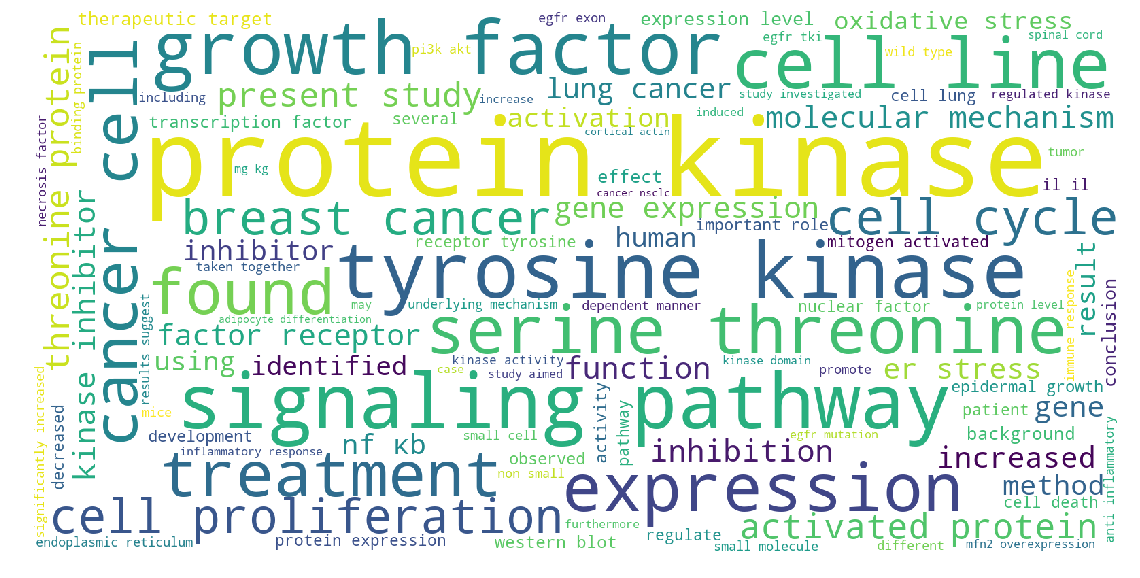

In [70]:
long_string = ','.join(list(df['Abstract'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, 
                      width=1600, height=800, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.jpeg', bbox_inches='tight')
# Visualize the word cloud
#wordcloud.to_image()

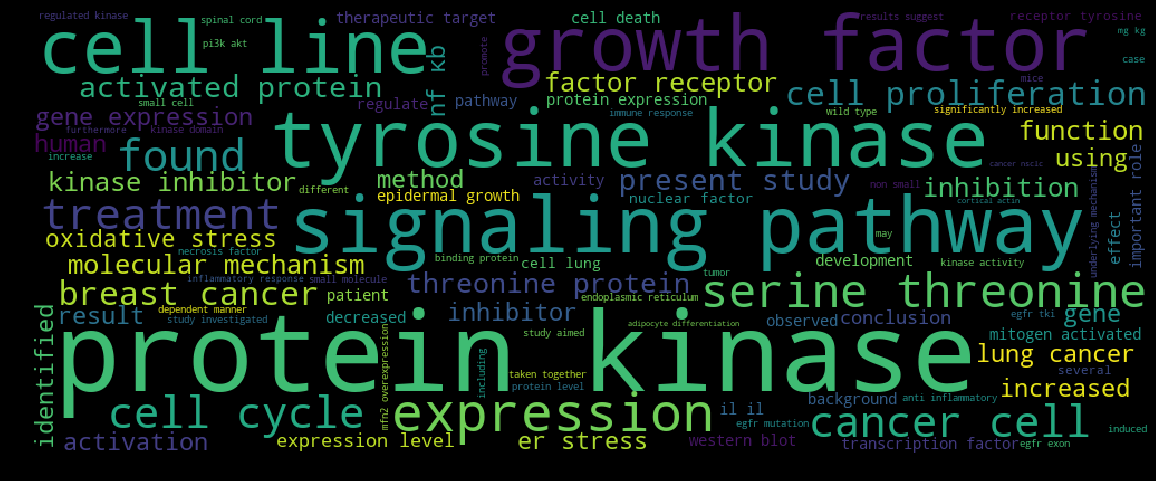

In [74]:

wordcloud = WordCloud(width=1000, height=400, max_words=100).generate(long_string)
# Open a plot of the generated image.

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")

plt.savefig('blackversion.png', facecolor='k', bbox_inches='tight')

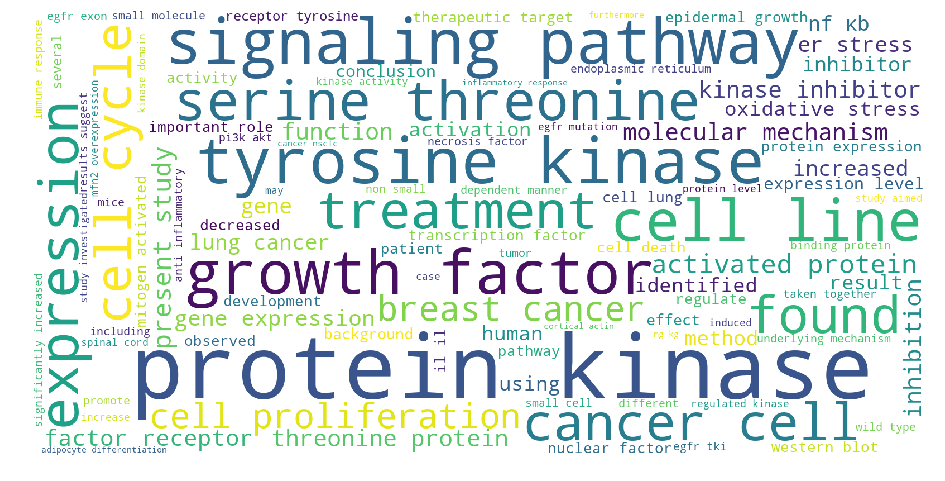

In [72]:
wordcloud = WordCloud(background_color="white", max_words=100, 
                      width=1600, height=800)

# Generate a word cloud
wordcloud.generate(long_string)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('wordcloud.jpeg', bbox_inches='tight')

In [75]:
df.shape

(3334, 5)

In [76]:
df.to_csv('pubmedarticles.csv')